In [163]:
wDupRemoveDir='/cellar/users/btsui/all_seq_snp/Homo_sapiens_all_merged_snp.TCGA.with_pcr_rm.pickle'

woDupRemoveDir='/cellar/users/btsui/all_seq_snp/Homo_sapiens_all_merged_snp.TCGA.pickle'

import pandas as pd
from tqdm import tqdm
import numpy as np

from scipy import stats

wDupRemoved=pd.read_pickle(wDupRemoveDir).loc['TCGA']

ProcessedRunDigits=wDupRemoved.index.get_level_values('Run_digits').unique()

woDupRemoved=pd.read_pickle(woDupRemoveDir)

m=woDupRemoved.index.get_level_values('Run_digits').isin(ProcessedRunDigits)

In [164]:
woDupRemoved_inDf=woDupRemoved[m].loc['TCGA']

In [352]:
corrDict={}
for queryUUID in tqdm(ProcessedRunDigits):
    woDupRemoved_inDf_tmp=woDupRemoved_inDf['ReadDepth'].loc[queryUUID]
    wDupRemoved_inDf_tmp=wDupRemoved['ReadDepth'].loc[queryUUID]
    mergedDf=np.log10(pd.DataFrame({'wo':woDupRemoved_inDf_tmp,
                  'w':wDupRemoved_inDf_tmp})+1).dropna()
    r,p=stats.pearsonr(mergedDf['wo'],mergedDf['w'])
    #print (r)
    
    ### fit for high allelic read counts
    mergedDfh=mergedDf[mergedDf['wo']>2]
    l_h =stats.linregress(mergedDfh['wo'],mergedDfh['w'])
    l_h.slope
    
    
    mergedDfl=mergedDf[mergedDf['wo']<2]
    l_l =stats.linregress(mergedDfl['wo'],mergedDfl['w'])
    #print(l_l.slope)
    corrDict[queryUUID]={'overall_r':r,'l_l_slope':l_l.slope,
                        'l_h_slope':l_h.slope}
    






  0%|          | 0/452 [00:00<?, ?it/s]




  0%|          | 1/452 [00:09<1:10:13,  9.34s/it]




  0%|          | 2/452 [00:19<1:12:51,  9.71s/it]




  1%|          | 3/452 [00:29<1:12:29,  9.69s/it]




  1%|          | 4/452 [00:39<1:13:45,  9.88s/it]




  1%|          | 5/452 [00:49<1:14:02,  9.94s/it]




  1%|▏         | 6/452 [00:59<1:14:02,  9.96s/it]




  2%|▏         | 7/452 [01:08<1:12:52,  9.83s/it]




  2%|▏         | 8/452 [01:16<1:10:45,  9.56s/it]




  2%|▏         | 9/452 [01:24<1:09:18,  9.39s/it]




  2%|▏         | 10/452 [01:32<1:08:04,  9.24s/it]




  2%|▏         | 11/452 [01:37<1:05:26,  8.90s/it]




  3%|▎         | 12/452 [01:46<1:04:54,  8.85s/it]




  3%|▎         | 13/452 [01:53<1:03:41,  8.70s/it]




  3%|▎         | 14/452 [02:00<1:03:03,  8.64s/it]




  3%|▎         | 15/452 [02:08<1:02:31,  8.58s/it]




  4%|▎         | 16/452 [02:16<1:02:01,  8.53s/it]




  4%|▍         | 17/452 [02:25<1:01:56,  8.54s/it]




  4%|▍         | 18/452 [

 52%|█████▏    | 237/452 [25:45<23:21,  6.52s/it]




 53%|█████▎    | 238/452 [25:50<23:14,  6.51s/it]




 53%|█████▎    | 239/452 [25:56<23:06,  6.51s/it]




 53%|█████▎    | 240/452 [26:02<23:00,  6.51s/it]




 53%|█████▎    | 241/452 [26:08<22:53,  6.51s/it]




 54%|█████▎    | 242/452 [26:14<22:45,  6.50s/it]




 54%|█████▍    | 243/452 [26:20<22:39,  6.50s/it]




 54%|█████▍    | 244/452 [26:25<22:31,  6.50s/it]




 54%|█████▍    | 245/452 [26:31<22:24,  6.50s/it]




 54%|█████▍    | 246/452 [26:37<22:17,  6.49s/it]




 55%|█████▍    | 247/452 [26:44<22:11,  6.50s/it]




 55%|█████▍    | 248/452 [26:51<22:05,  6.50s/it]




 55%|█████▌    | 249/452 [26:57<21:58,  6.50s/it]




 55%|█████▌    | 250/452 [27:02<21:51,  6.49s/it]




 56%|█████▌    | 251/452 [27:06<21:42,  6.48s/it]




 56%|█████▌    | 252/452 [27:11<21:34,  6.47s/it]




 56%|█████▌    | 253/452 [27:17<21:27,  6.47s/it]




 56%|█████▌    | 254/452 [27:23<21:21,  6.47s/it]




 56%|█████▋    | 255/452 [27

In [353]:
#mergedStatDf.loc[ProcessedRunDigits[0]]

In [354]:
mergedStatDf=pd.DataFrame(corrDict).T

In [350]:
mergedStatDf.quantile(0.5,axis=0)

l_h_slope    0.337517
l_l_slope    0.889199
overall_r    0.986250
Name: 0.5, dtype: float64

In [347]:
mergedStatDf.quantile(0.025,axis=0)

l_h_slope    0.281840
l_l_slope    0.877407
overall_r    0.982995
Name: 0.025, dtype: float64

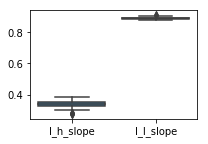

In [273]:
fig,ax=plt.subplots(figsize=(3,2))
ax=sns.boxplot(data=mergedStatDf[['l_h_slope','l_l_slope']])
ax.set_title('slope')

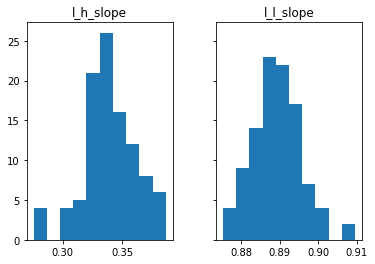

In [266]:
axes=mergedStatDf[['l_h_slope','l_l_slope']].hist(sharey=True)
for ax in axes.flatten():
    ax.grid(False)


In [255]:
r_l

NameError: name 'r_l' is not defined

In [ ]:

corrS=pd.Series(corrDict)

In [171]:
corrS.quantile(0.025),corrS.quantile(0.05),corrS.quantile(1-0.025)

(0.9828144840044503, 0.9831999657939651, 0.990159227830007)

In [11]:
import seaborn as sns
%matplotlib inline

In [13]:
from scipy import stats

In [298]:
tmpMergedDf=(mergedDf)

LinregressResult(slope=0.8857445760190211, intercept=0.035048564933380266, rvalue=0.989165368230053, pvalue=0.0, stderr=0.0003237167782106638)
LinregressResult(slope=0.30473605250695773, intercept=1.2763011970689413, rvalue=0.7949899160609349, pvalue=0.0, stderr=0.000864140900160121)


/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


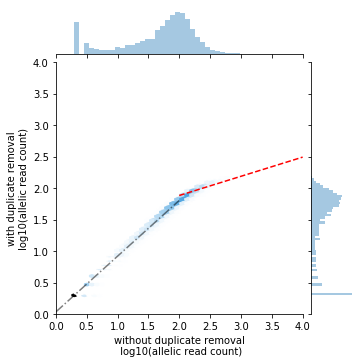

In [355]:
g=sns.jointplot(data=mergedDf,x='wo',y='w',kind='hex',xlim=[0,4],ylim=[0,4],size=5,stat_func=None)
g.set_axis_labels(xlabel='without duplicate removal\n log10(allelic read count)',ylabel='with duplicate removal\nlog10(allelic read count)')
#g.ax_joint.axhline(6)

base=3
cutoff=2
tmpSubDf=tmpMergedDf[(tmpMergedDf.mean(axis=1)<=cutoff)]
l_l=stats.linregress(tmpSubDf['wo'],tmpSubDf['w'])
print(l_l)
g.ax_joint.plot(
    np.arange(0,cutoff+1,),np.arange(0,cutoff+1)*l_l.slope+l_l.intercept,alpha=0.5,linestyle='-.',color='black')


cutoff=2
tmpSubDf=tmpMergedDf[(tmpMergedDf.mean(axis=1)>cutoff)]
l_h=stats.linregress(tmpSubDf['wo'],tmpSubDf['w'])
print(l_h)
g.ax_joint.plot(
    np.arange(0,cutoff+1)+cutoff,np.arange(cutoff,cutoff+cutoff+1)*l_h.slope+l_h.intercept,linestyle='--',color='red')


#g.savefig('./')
#g.ax_joint.grid(True)
#g.ax_joint.axvline(6)

In [322]:
np.arange(0,cutoff+1)*l_l.slope+l_l.intercept

array([0.05092114, 0.86934295])

In [321]:
#woDupRemoved_inDf_tmp

array([0, 1])

In [18]:
woDupRemoved_inDf_DepthS=(woDupRemoved_inDf_tmp.groupby(['Chr','Pos']).sum())
wDupRemoved_inDf_DepthS=wDupRemoved_inDf_tmp.groupby(['Chr','Pos']).sum()

In [19]:
#wDupRemoved_inDf_DepthS

In [20]:
tmpI=woDupRemoved_inDf_tmp.index.to_frame().set_index(['Chr','Pos']).index

In [21]:
woDupRemoved_inDf_DepthS_algned=woDupRemoved_inDf_DepthS[tmpI]

In [22]:
tmpI=wDupRemoved_inDf_tmp.index.to_frame().set_index(['Chr','Pos']).index

In [23]:
wDupRemoved_inDf_DepthS_algned=wDupRemoved_inDf_DepthS[tmpI]

In [24]:
woDupRemoved_inDf_AllelicFreqS=woDupRemoved_inDf_tmp/woDupRemoved_inDf_DepthS_algned.values
wDupRemoved_inDf_AllelicFreqS=wDupRemoved_inDf_tmp/wDupRemoved_inDf_DepthS_algned.values

In [25]:
%time allelicDf=pd.DataFrame({'woDupRemoved':woDupRemoved_inDf_AllelicFreqS,'wDupRemoved':wDupRemoved_inDf_AllelicFreqS}).dropna()

CPU times: user 13.1 s, sys: 540 ms, total: 13.7 s
Wall time: 2.27 s


### load in dbSNP vcf

In [26]:
inVcfDir='/data/cellardata/users/btsui/dbsnp/Homo_sapiens/All_20170710.f1_byte2_not_00.vcf.gz' 
vcfDf=pd.read_csv(inVcfDir,sep='\t',header=None)
vcfDf.columns=['Chr','Pos','RsId','RefBase','AltBase','','','Annot']
vcfDf['Chr']=vcfDf['Chr'].astype(np.str)

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
allelicDfResetDf=allelicDf.reset_index()

In [28]:
refI=vcfDf.set_index(['Chr','Pos','RefBase']).index

In [29]:
ChrPosI=allelicDfResetDf.set_index(['Chr','Pos','base']).index

In [30]:
ref_m=ChrPosI.isin(refI)

In [31]:
allelicDfResetDf['is_ref']=ref_m

In [57]:
bins = np.linspace(0, 1, 11)


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [62]:
allelicDfResetDf['wDupRemoved_bin']=np.digitize(allelicDfResetDf['wDupRemoved'],bins)

In [ ]:
(allelicDfResetDf['woDupRemoved']-allelicDfResetDf['wDupRemoved']).abs()

In [70]:
allelicDfResetDf['abs_diff']=(allelicDfResetDf['woDupRemoved']-allelicDfResetDf['wDupRemoved']).abs()

In [76]:
woDupRemoved_inDf_DepthS_algned.head()

Chr  Pos   
1    14727     700
     14727     700
     630825      7
     630833      5
     850609      1
Name: ReadDepth, dtype: uint16

In [78]:
allelicDfResetDf['woDupRemoved_inDf_DepthS']=woDupRemoved_inDf_DepthS[ChrPosI].values

In [87]:
allelicDfResetDf['woDupRemoved_inDf_DepthS_log10']=np.log10(allelicDfResetDf['woDupRemoved_inDf_DepthS']+1)

In [88]:
binsize=1
allelicDfResetDf['woDupRemoved_inDf_DepthS_bin']=(allelicDfResetDf['woDupRemoved_inDf_DepthS_log10']/binsize).astype(int)*binsize

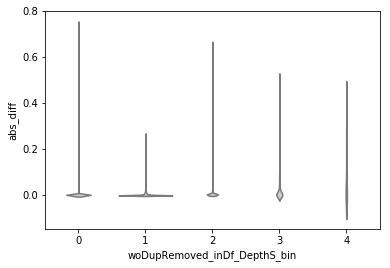

In [92]:
ax = sns.violinplot(data=allelicDfResetDf,x="woDupRemoved_inDf_DepthS_bin", y="abs_diff",
                     inner=None, color=".8")


In [99]:
allelicDfResetDf.head()

Chr     Pos base  woDupRemoved  wDupRemoved  is_ref  wDupRemoved_bin  \
0   1   14727    A      0.062857     0.085714   False                1   
1   1   14727    G      0.937143     0.914286    True               10   
2   1  630825    T      1.000000     1.000000    True               11   
3   1  630833    C      1.000000     1.000000    True               11   
4   1  850609    T      1.000000     1.000000    True               11   

   abs_diff  woDupRemoved_inDf_DepthS  woDupRemoved_inDf_DepthS_bin  \
0  0.022857                       700                             2   
1  0.022857                       700                             2   
2  0.000000                         7                             0   
3  0.000000                         5                             0   
4  0.000000                         1                             0   

   woDupRemoved_inDf_DepthS_log  woDupRemoved_inDf_DepthS_log10  
0                      2.845718                        2.845718  
1                      2.845718                        2.845718  
2                      0.903090                        0.903090  
3                      0.778151                        0.778151  
4                      0.301030                        0.301030

In [108]:
allelicDfResetDf.head()

Chr     Pos base  woDupRemoved  wDupRemoved  is_ref  wDupRemoved_bin  \
0   1   14727    A      0.062857     0.085714   False                1   
1   1   14727    G      0.937143     0.914286    True               10   
2   1  630825    T      1.000000     1.000000    True               11   
3   1  630833    C      1.000000     1.000000    True               11   
4   1  850609    T      1.000000     1.000000    True               11   

   abs_diff  woDupRemoved_inDf_DepthS  woDupRemoved_inDf_DepthS_bin  \
0  0.022857                       700                             2   
1  0.022857                       700                             2   
2  0.000000                         7                             0   
3  0.000000                         5                             0   
4  0.000000                         1                             0   

   woDupRemoved_inDf_DepthS_log  woDupRemoved_inDf_DepthS_log10  
0                      2.845718                        2.845718  
1                      2.845718                        2.845718  
2                      0.903090                        0.903090  
3                      0.778151                        0.778151  
4                      0.301030                        0.301030

In [124]:
import matplotlib.pyplot as plt

array([0, 1, 2, 3])

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


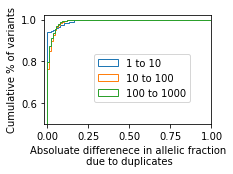

In [327]:
myBin=2
n_bins=100
fig, ax = plt.subplots(figsize=(3, 2))
# plot the cumulative histogram
# "xx to xx read "
for myBin in np.arange(0,3):
    x=allelicDfResetDf['abs_diff'][(allelicDfResetDf['woDupRemoved_inDf_DepthS_bin']==myBin)&(~allelicDfResetDf.is_ref)]#.sample(1000)
    n, bins, patches = ax.hist(x, n_bins, normed=1, histtype='step',
                               cumulative=True, label='{} to {}'.format(10**(myBin),10**(myBin+1)),range=[0,1.1])
ax.set_xlim([-0.02,1.0])
ax.set_ylim([0.5,1.02])
ax.set_ylabel('Cumulative % of variants')
ax.set_xlabel('Absoluate differenece in allelic fraction\n due to duplicates')
ax.legend(loc=(0.3,0.2))

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Absoluate differenece in allelic fraction due to duplicates')

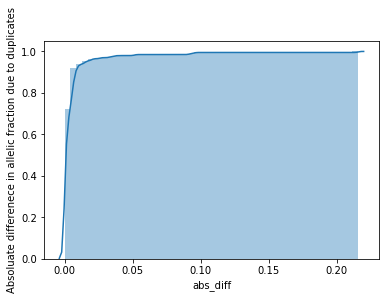

In [121]:
#x, 0 to 1
ax=sns.distplot(allelicDfResetDf['abs_diff'][allelicDfResetDf['woDupRemoved_inDf_DepthS_bin']==2].sample(200),
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True),
               )

ax.set_ylabel('Cumulative % of samples')
ax.set_ylabel('Absoluate differenece in allelic fraction due to duplicates')

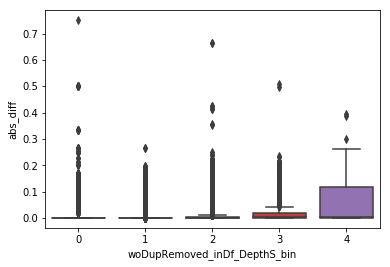

In [94]:
sns.boxplot(data=allelicDfResetDf,x='woDupRemoved_inDf_DepthS_bin',y='abs_diff')

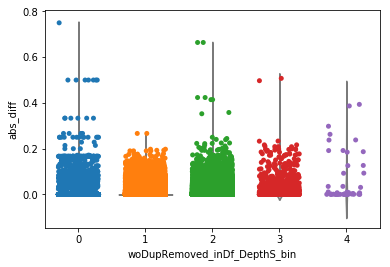

In [91]:
##
sns.stripplot(data=allelicDfResetDf,x='woDupRemoved_inDf_DepthS_bin',y='abs_diff',jitter=0.3)

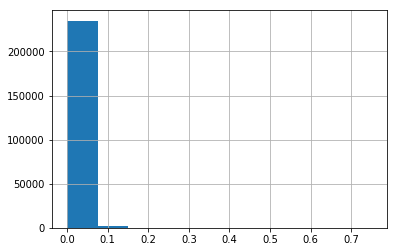

In [68]:
ax=.hist()

In [64]:
allelicDfResetDf.head()

Chr     Pos base  woDupRemoved  wDupRemoved  is_ref  wDupRemoved_bin
0   1   14727    A      0.062857     0.085714   False                1
1   1   14727    G      0.937143     0.914286    True               10
2   1  630825    T      1.000000     1.000000    True               11
3   1  630833    C      1.000000     1.000000    True               11
4   1  850609    T      1.000000     1.000000    True               11

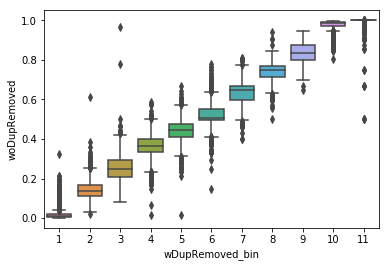

In [65]:
sns.boxplot(data=allelicDfResetDf[~allelicDfResetDf.is_ref],x='wDupRemoved_bin',y='woDupRemoved')

In [47]:
np.digitize(allelicDfResetDf['wDupRemoved'],bins=10)

ValueError: object of too small depth for desired array

In [48]:
#allelicDfResetDf['wDupRemoved']

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


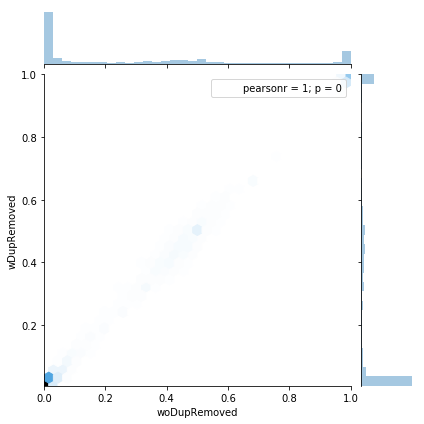

In [39]:
sns.jointplot(data=allelicDfResetDf[(~allelicDfResetDf['is_ref'])&(allelicDfResetDf['woDupRemoved']>0)&(allelicDfResetDf['woDupRemoved']<1.0)],x='woDupRemoved',y='wDupRemoved',kind='hex')

In [137]:
### variant allele only
sns.jointplot(data=allelicDf,x='woDup',y='wDup')

woDup      wDup
Chr Pos      base                    
1   14727    A     0.062857  0.085714
             G     0.937143  0.914286
    630825   T     1.000000  1.000000
    630833   C     1.000000  1.000000
    850609   T     1.000000  1.000000
    948136   G     1.000000  1.000000
    955964   G     1.000000  1.000000
    970788   G     1.000000  1.000000
    1013541  C     0.581967  0.510204
             T     0.409836  0.489796
    1014143  C     1.000000  1.000000
    1014228  G     1.000000  1.000000
    1014316  C     0.997067  1.000000
    1014359  G     1.000000  1.000000
    1020217  G     1.000000  1.000000
    1020221  C     1.000000  1.000000
    1020239  G     1.000000  1.000000
    1022188  A     1.000000  1.000000
    1022225  A     0.007092  0.008929
             G     0.992908  0.991071
    1022260  C     0.997783  1.000000
    1022313  A     0.993318  1.000000
    1040679  C     1.000000  1.000000
    1041174  C     1.000000  1.000000
    1041183  C     1.000000  1.000000
    1041218  A     0.066667  0.076923
             C     0.933333  0.923077
    1041249  C     1.000000  1.000000
    1041582  C     1.000000  1.000000
    1041583  A     0.987013  1.000000
...                     ...       ...
Y   26420477 G     0.888889  0.904762
    26508094 A     0.750000  0.750000
             G     0.250000  0.250000
    26509986 C     1.000000  1.000000
    26510310 G     1.000000  1.000000
    26510337 A     1.000000  1.000000
    26510425 G     1.000000  1.000000
    26515535 A     0.181818  0.181818
             G     0.818182  0.818182
    26515550 C     0.833333  0.833333
             T     0.166667  0.166667
    26515553 A     0.833333  0.833333
             G     0.166667  0.166667
    26515558 A     0.866667  0.857143
             C     0.133333  0.142857
    26530858 G     1.000000  1.000000
    26530883 A     1.000000  1.000000
    26530902 C     1.000000  1.000000
    26541498 C     1.000000  1.000000
    26541512 A     1.000000  1.000000
    26543653 C     1.000000  1.000000
    26554088 A     1.000000  1.000000
    26557077 C     0.053763  0.013158
             T     0.946237  0.986842
    26557102 C     0.747664  0.769231
             T     0.252336  0.230769
    26566504 G     1.000000  1.000000
    26567812 C     1.000000  1.000000
    26567857 C     1.000000  1.000000
    26568527 C     1.000000  1.000000

[237318 rows x 2 columns]

In [133]:
allelicDf.corr()

wo_allele        w
wo_allele    1.00000  0.99838
w            0.99838  1.00000

In [118]:
tmpDf2=pd.DataFrame({'wo_alle':woDupRemoved_inDf_tmp,'wo_allel_site_depth':woDupRemoved_inDf_DepthS_algned,
                  'w':wDupRemoved_inDf_tmp})

ValueError: operands could not be broadcast together with shapes (447902,2) (3,) (447902,2) 

In [ ]:
%time allelicFracDf=tmpDf2.groupby(['Chr','Pos']).sum(axis=0)

In [290]:
0.873/0.220

3.9681818181818183

In [331]:
tmpDf10=woDupRemoved_inDf.loc['51da3bb2-6045-4f15-a7da-0dec84dda0ed']

In [342]:
tmpDf10

features          ReadDepth  AverageBaseQuality
Chr Pos     base                               
1   14727   A             9                  27
            G            95                  32
            T             1                   2
    630825  T             4                  34
    630833  C             4                  33
    948136  G             4                  33
    955964  G           102                  32
    970788  G            39                  32
    1013541 C            39                  31
    1014143 C            51                  31
    1014228 A            28                  33
            G            41                  33
    1014316 C            96                  29
    1014359 G            83                  28
    1020217 G             1                  26
    1020221 C             1                  33
    1020239 G             1                  22
    1022188 A            87                  31
    1022225 G           121                  31
            T             1                  19
    1022260 C           204                  29
    1022313 A           217                  31
            G             1                   6
            T             1                   2
    1041218 C             1                  31
    1041249 C             2                  11
    1041582 C            48                  30
    1041583 A            48                  28
            C             1                   2
    1041648 G            75                  29
...                     ...                 ...
MT  15553   G            15                  34
    15572   T             8                  32
    15579   A             8                  32
    15607   A             5                  31
    15615   G             2                  34
    15637   C             1                  36
    15649   A             2                  35
    15670   T             8                  31
    15682   A             8                  32
    15746   A             9                  33
    15758   A            13                  32
    15784   T            12                  33
    15812   G            12                  30
    15833   C             8                  33
    15848   A             6                  32
    15884   G             1                  34
    15890   C             1                  33
    15923   A             4                  33
    15927   G             4                  33
    15928   G             4                  34
    15932   T             4                  32
    15943   T             3                  33
    15950   G             4                  33
    15965   A             4                  33
    15967   G             4                  32
    15990   C             1                  33
    16188   C            15                  26
    16278   C            30                  33
    16390   G            18                  33
    16519   T             7                  32

[242114 rows x 2 columns]

In [341]:
tmpDf10.unstack().fillna(0)['ReadDepth']

base             A      C      G     T
Chr Pos                               
1   14727      9.0    0.0   95.0   1.0
    630825     0.0    0.0    0.0   4.0
    630833     0.0    4.0    0.0   0.0
    948136     0.0    0.0    4.0   0.0
    955964     0.0    0.0  102.0   0.0
    970788     0.0    0.0   39.0   0.0
    1013541    0.0   39.0    0.0   0.0
    1014143    0.0   51.0    0.0   0.0
    1014228   28.0    0.0   41.0   0.0
    1014316    0.0   96.0    0.0   0.0
    1014359    0.0    0.0   83.0   0.0
    1020217    0.0    0.0    1.0   0.0
    1020221    0.0    1.0    0.0   0.0
    1020239    0.0    0.0    1.0   0.0
    1022188   87.0    0.0    0.0   0.0
    1022225    0.0    0.0  121.0   1.0
    1022260    0.0  204.0    0.0   0.0
    1022313  217.0    0.0    1.0   1.0
    1041218    0.0    1.0    0.0   0.0
    1041249    0.0    2.0    0.0   0.0
    1041582    0.0   48.0    0.0   0.0
    1041583   48.0    1.0    0.0   0.0
    1041648    0.0    0.0   75.0   1.0
    1041950    0.0   48.0    0.0   0.0
    1042136    0.0    0.0    0.0  33.0
    1042190   15.0    0.0    0.0   0.0
    1043223    0.0    9.0    0.0   0.0
    1043248    0.0   16.0    0.0   0.0
    1043288    0.0    0.0   28.0   0.0
    1043382    0.0    0.0   12.0   0.0
...            ...    ...    ...   ...
MT  15553      0.0    0.0   15.0   0.0
    15572      0.0    0.0    0.0   8.0
    15579      8.0    0.0    0.0   0.0
    15607      5.0    0.0    0.0   0.0
    15615      0.0    0.0    2.0   0.0
    15637      0.0    1.0    0.0   0.0
    15649      2.0    0.0    0.0   0.0
    15670      0.0    0.0    0.0   8.0
    15682      8.0    0.0    0.0   0.0
    15746      9.0    0.0    0.0   0.0
    15758     13.0    0.0    0.0   0.0
    15784      0.0    0.0    0.0  12.0
    15812      0.0    0.0   12.0   0.0
    15833      0.0    8.0    0.0   0.0
    15848      6.0    0.0    0.0   0.0
    15884      0.0    0.0    1.0   0.0
    15890      0.0    1.0    0.0   0.0
    15923      4.0    0.0    0.0   0.0
    15927      0.0    0.0    4.0   0.0
    15928      0.0    0.0    4.0   0.0
    15932      0.0    0.0    0.0   4.0
    15943      0.0    0.0    0.0   3.0
    15950      0.0    0.0    4.0   0.0
    15965      4.0    0.0    0.0   0.0
    15967      0.0    0.0    4.0   0.0
    15990      0.0    1.0    0.0   0.0
    16188      0.0   15.0    0.0   0.0
    16278      0.0   30.0    0.0   0.0
    16390      0.0    0.0   18.0   0.0
    16519      0.0    0.0    0.0   7.0

[205539 rows x 4 columns]